In [210]:
import pickle
import numpy as np

f = open(f"full-sim-data/1002.pkl", "rb");
    
stuff = pickle.load(f)
arr = np.array(stuff)
print(arr.shape)

f.close()

num_vals = arr.shape[1]




(6, 5983750)


In [211]:
import math

def find_nearest_num(x):
    num = x - (x % 12)  # Find nearest number that is a multiple of 12
    while True:
        num -= 12
        if num % 12 == 0 and math.sqrt(num/12).is_integer():
            return num

In [212]:
from math import sqrt


# NSIDE = 512
# NUMPIX = 12 * NSIDE ** 2

NUMPIX = find_nearest_num(num_vals)
NSIDE = int(sqrt(NUMPIX // 12))


print("NSIDE: ", NSIDE)
print("NUMPIX: ", NUMPIX)

NSIDE:  706
NUMPIX:  5981232


In [244]:
import healpy as hp
from math import pi, sin, cos

def deg_to_rad(ang):
    return ang * 2 * pi / 360.0

x = [[-1, -1]] * NUMPIX
y = [0] * NUMPIX


def get_xyz(theta, phi, dist):

    x = dist * sin(theta) * cos(phi) # r sin(theta) cos(phi) 
    y = dist * sin(theta) * sin(phi)
    z = dist * cos(theta)

    return x, y, z

def cart_dist(x1, y1, z1, x2, y2, z2):
    return sqrt(
        (x1 - x2) ** 2 + 
        (y1 - y2) ** 2 + 
        (z1 - z2) ** 2
    )


avg_theta = deg_to_rad(np.average(arr[2]))
avg_phi = deg_to_rad(np.average(arr[3]))

avg_x, avg_y, avg_z = get_xyz(avg_theta, avg_phi, 1)

RADIUS_THRESHOLD = 1.3

for i in range(num_vals):
    energy = arr[1][i]
    theta = arr[2][i]
    phi = arr[3][i]
    angle = arr[4][i]
    dist = arr[5][i]

    x1, y1, z1 = get_xyz(theta, phi, 1)

    if angle >= 20 and angle < 25:

        theta = deg_to_rad(theta)
        phi = deg_to_rad(phi)
        angle = deg_to_rad(angle)

        if cart_dist(x1, y1, z1, avg_x, avg_y, avg_z) <= RADIUS_THRESHOLD:
            # ISSUE: Some indexes getting cut here. Like there may not be a value in the subset for a given heal_index.
            heal_index = hp.ang2pix(NSIDE, theta, phi)

            x_val = np.array([theta, phi])
            y_val = energy


            x[heal_index] = x_val
            y[heal_index] = y_val
            
            if i % 100000 == 0:
                print(i)
    
x = np.array(x)
y = np.array(y)


4500000


In [223]:
avg_phi

12.088467701533753

In [224]:

print(x[5])
print(y.shape)

TypeError: 'float' object is not subscriptable

In [225]:
print(y[60])

TypeError: 'float' object is not subscriptable

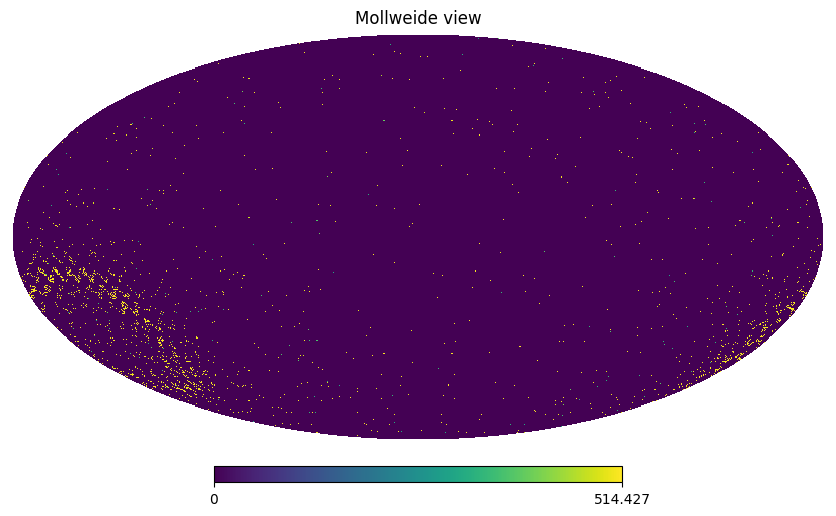

In [245]:
hp.mollview(y)

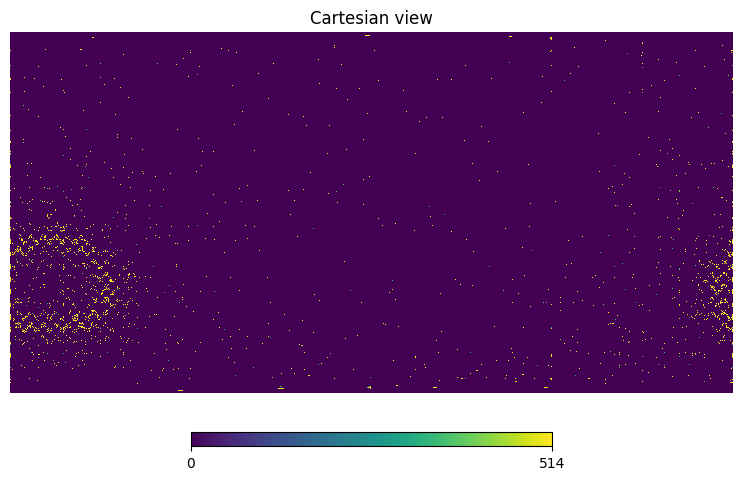

In [246]:
hp.cartview(y)

/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


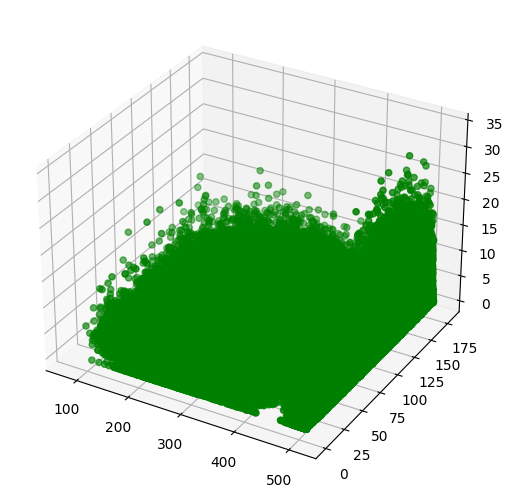

In [218]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

thetas = arr[1]
phis = arr[2]
distances = arr[5]

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(thetas, phis, distances, color='green')


(array([  75442.,  228315.,  354081.,  517681.,  681577., 1222432.,
        1091477.,  938993.,  666510.,  207242.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <BarContainer object of 10 artists>)

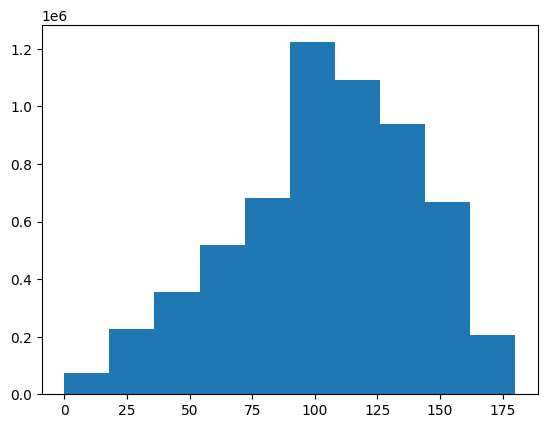

In [219]:
import matplotlib.pyplot as plt
plt.hist(arr[2])

In [220]:
import matplotlib.pyplot as plt



In [221]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

train_set = TensorDataset(torch.tensor(x_train).to(dtype=base, device=device), torch.tensor(y_train).to(dtype=base, device=device))
val_set = TensorDataset(torch.tensor(x_val).to(dtype=base, device=device), torch.tensor(y_val).to(dtype=base, device=device))
test_set = TensorDataset(torch.tensor(x_test).to(dtype=base, device=device), torch.tensor(y_test).to(dtype=base, device=device))

train_loader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, BATCH_SIZE, shuffle=True)

/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'torch' is not defined